# Cohort Analysis

### The objective of this analysis is to calculate customer retention rate.

Retention Rate is defined as the number of customers who continue to use a product/services, its measured as the number of returning users, at a regular interval such as every week or month, grouped by their period that they signed up. 

In this project, I will examine the well-known Superstore dataset and use Python to create a retention cohort analysis that will compare the retention rates for 2017 and 2016.

**Reading Datasets**

In [1]:
cd C:\Users\**\**\**

C:\Users\**\**\**


In [2]:
# Import Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#function for invoice month
import datetime as dt

In [3]:
# Import the data
df = pd.read_csv('Sample - Superstore.csv')

In [4]:
# Display Few rows

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**About the dataset**

In [5]:
# Check the info for various colunms and datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
# Show all columns
for col in df.columns:
    print(col)

Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit


In [7]:
# Checking the the number of columns and rows of the data 

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 9994 rows and 21 columns in the dataset.


**2.Exploratory data analysis & data cleaning**


The data has 21 columns. No need to the Row ID thus it will be droped


In [8]:
# Drop Row ID

df.drop('Row ID' ,inplace = True, axis = 1)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# Re-checking the shape

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.")

There are 9994 rows and 20 columns in the dataset.


In [10]:
# Converting Postal Code column to strings

df['Postal Code'] = df['Postal Code'].astype('str')
df['Postal Code'].dtype

dtype('O')

In [11]:
# Converting Order Date column to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
# ReGenerate the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   object        
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

**Check the summary statistics of the data**

In [13]:
# Describe the dataset

df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656897
std,623.245104,2.225110,0.206452,234.260100
min,0.444000,1.000000,0.000000,-6599.980000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Checking for duplicates**


In [14]:
# Show if there are any duplicates 
df.duplicated().sum()

1

There is one duplicate in the dataset 



In [15]:
# Show the duplicate entry
duplicates = df.duplicated(keep = False)
df[duplicates]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [16]:
# Drop the duplicate

df.drop_duplicates(inplace = True)

In [17]:
# Recheck data shape

df.shape

(9993, 20)

**Checking Missing Values**


In [18]:
# Check the sum of all missing values in the data

df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Inspecting and exploring various columns of the data


In [19]:
categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

**Some Data Visualization to Explore Categorical Variable**

In [20]:
# Show Categorical Columns in the data

for col in categorical_var.columns:
    print(col)

Order ID
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name


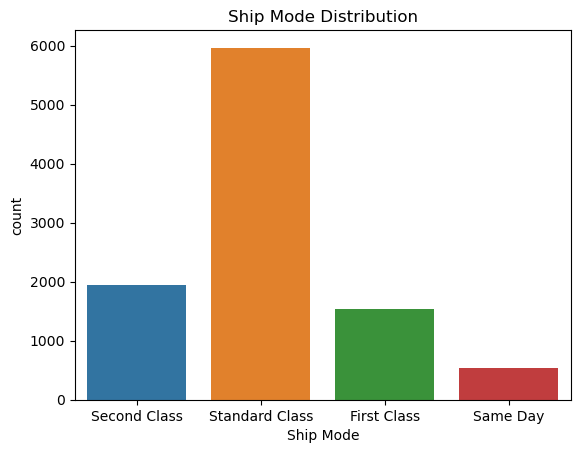

In [21]:
# Explore Ship Mode column

sns.countplot(x="Ship Mode", data = df)
plt.title("Ship Mode Distribution")
plt.show()

In [22]:
# Explore Ship Mode column
x="Ship Mode"
print(df[x].value_counts(), "\n")

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64 



In [23]:
# Explore Customer Name column of the date

# Output the head of "Customer Name"
df["Customer Name"].head()

0        Claire Gute
1        Claire Gute
2    Darrin Van Huff
3     Sean O'Donnell
4     Sean O'Donnell
Name: Customer Name, dtype: object

In [24]:
x="Customer Name"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")


Summary  

count              9993
unique              793
top       William Brown
freq                 37
Name: Customer Name, dtype: object 

Value count 

William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64 



In [25]:
# Explore Segment column of the date

# Output the head of "Segment"
df["Segment"].head()

0     Consumer
1     Consumer
2    Corporate
3     Consumer
4     Consumer
Name: Segment, dtype: object

In [26]:
x="Segment"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")


Summary  

count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object 

Value count 

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64 



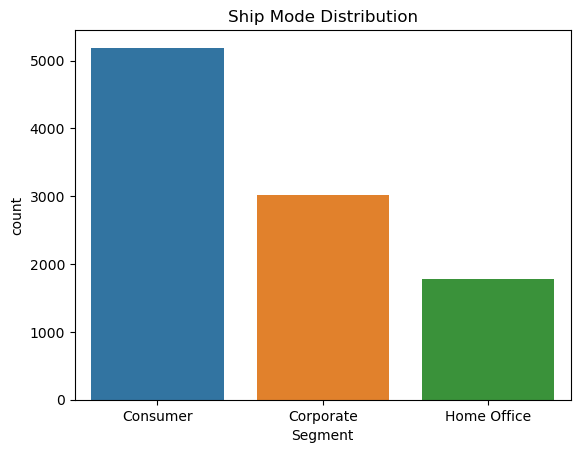

In [27]:
# Explore Segment column

sns.countplot(x="Segment", data = df)
plt.title("Ship Mode Distribution")
plt.show()

In [28]:
# Explore Country column of the date
x="Country"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")

Summary  

count              9993
unique                1
top       United States
freq               9993
Name: Country, dtype: object 

Value count 

United States    9993
Name: Country, dtype: int64 



In [29]:
# Explore City column of the data
x="City"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")

Summary  

count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object 

Value count 

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64 



Summary  

count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object 

Value count 

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64 



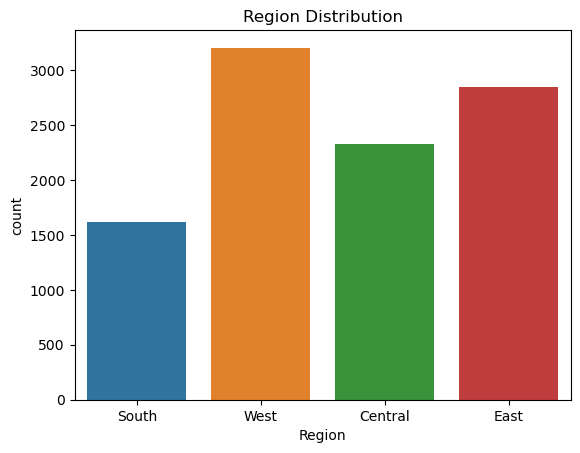

In [30]:
# Explore Region column of the data
x="Region"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")

# Plot the region 
sns.countplot(x="Region", data = df)
plt.title("Region Distribution")
plt.show()

Summary  

count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object 

Value count 

Office Supplies    6026
Furniture          2120
Technology         1847
Name: Category, dtype: int64 



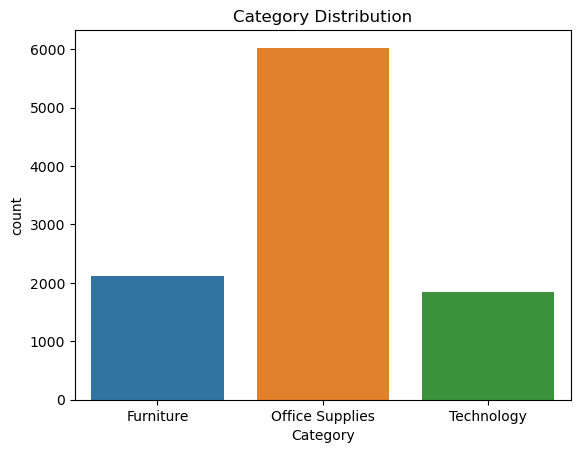

In [31]:
# Explore Category column of the data
x="Category"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")

# Plot the Category Column 
sns.countplot(x="Category", data = df)
plt.title("Category Distribution")
plt.show()

Summary  

count        9993
unique         17
top       Binders
freq         1523
Name: Sub-Category, dtype: object 

Value count 

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64 



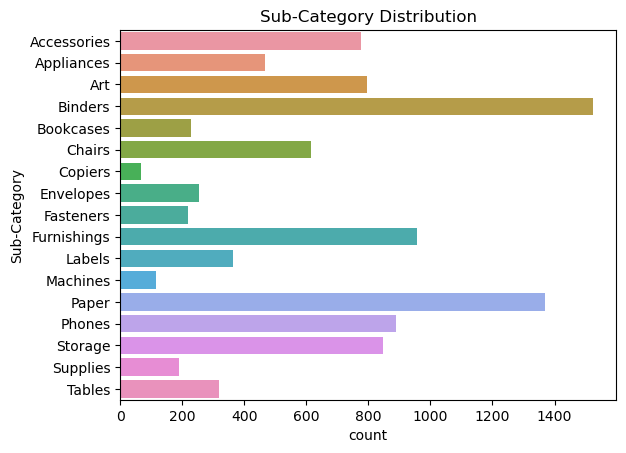

In [32]:
# Explore Sub-Category column of the data
x="Sub-Category"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")

# Plot the Sub-Category Column 
sns.barplot(y="Sub-Category", x="count", data=df.groupby('Sub-Category').size().to_frame(name='count').reset_index(), orient='h')
plt.title("Sub-Category Distribution")
plt.show()

In [33]:
# Explore Product column of the data
x="Product Name"
print("Summary  \n")
print(df[x].describe(), "\n")
print("===============================")
print("Value count \n")
print(df[x].value_counts(), "\n")


Summary  

count                9993
unique               1850
top       Staple envelope
freq                   48
Name: Product Name, dtype: object 

Value count 

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342               

*Exploring the Numerical Variables*


In [34]:
# Output the columns of the numerical variables

for col in numerical_var :
    print(col)

Sales
Quantity
Discount
Profit


In [35]:
def explore_numerical_var(df, col_name):
    """
    This function explores a numerical variable in a DataFrame.
    Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      col_name (str): The name of the numerical column to explore.
    """
    # Summary
    print("Summary statistics:")
    print(df[col_name].describe(include='all'))
    print("=================================================")
    print(f"Missing values: {df[col_name].isnull().sum()}")
    print("=================================================")

    # Histogram 
    plt.figure(figsize=(4, 4))
    plt.hist(df[col_name], bins=10, alpha=0.5, edgecolor="black")
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.title("Histogram of " + col_name)
    plt.tight_layout()
    plt.show()

    # Box plot
    plt.figure(figsize=(4, 4))
    sns.boxplot(
        showmeans=True,
        medianprops={"linewidth": 3, "color": "gold"},
        meanprops={"marker": "D", "markeredgecolor": "black", "markerfacecolor": "firebrick"},
        data=df,
        x=col_name
    )
    
    plt.xlabel(col_name)
    plt.ylabel("Value")
    plt.title("Boxplot of " + col_name)
    plt.tight_layout()
    plt.show()

Summary statistics:
count     9993.000000
mean       229.852846
std        623.276078
min          0.444000
25%         17.280000
50%         54.480000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64
Missing values: 0


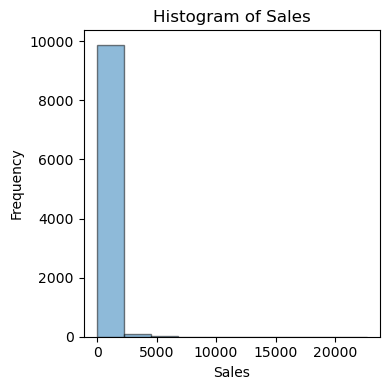

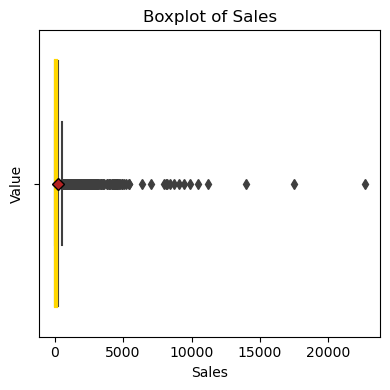

In [36]:
# Explore Sales column of the date
explore_numerical_var(df, "Sales")

In [37]:
# Find indices of rows with maximum 
max_sale_index = df['Sales'].idxmax()

# Print results with descriptive labels
print("Row with Maximum Sales:")
df.iloc[[max_sale_index]]  # Access row using index



Row with Maximum Sales:


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.08


In [38]:
# Find indices of rows with maximum 
min_sale_index = df['Sales'].idxmin()

print("\nRow with Minimum Sales:")
df.iloc[[min_sale_index]]  # Access row using index


Row with Minimum Sales:


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4102,US-2017-102288,2017-06-19,2017-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000740,Office Supplies,Paper,Xerox 1982,146.176,8,0.2,47.5072


Summary statistics:
count    9993.000000
mean        3.789753
std         2.225149
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64
Missing values: 0


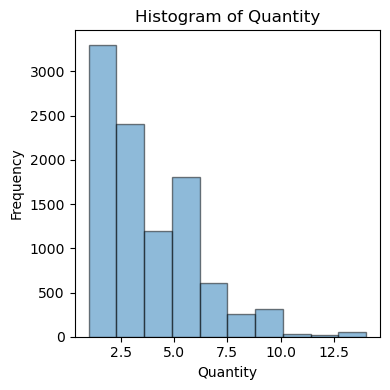

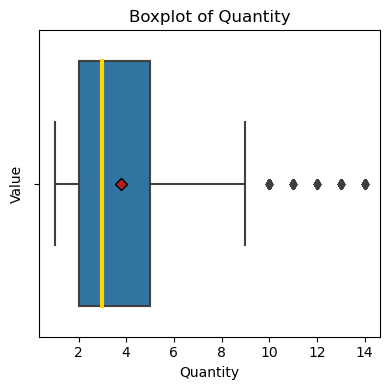

In [39]:
# Explore Quantity column of the date
explore_numerical_var(df, "Quantity")

Summary statistics:
count    9993.000000
mean       28.660971
std       234.271468
min     -6599.980000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64
Missing values: 0


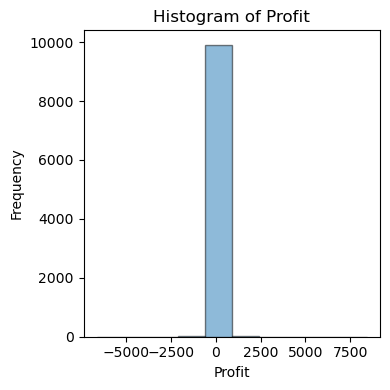

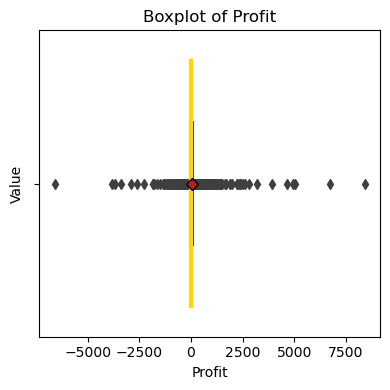

In [40]:
# Explore Profit column of the date
explore_numerical_var(df, "Profit")

Summary statistics:
count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64
Missing values: 0


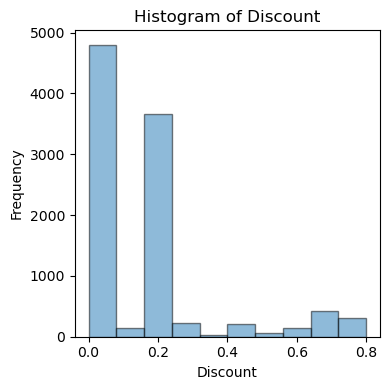

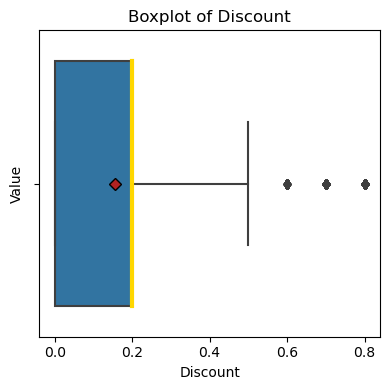

In [41]:
# Explore Discount column of the date
explore_numerical_var(df, "Discount")

### Time-based cohort analysis


***Analysis of Cohort for the year 2017***

In [42]:
# Extract 2017 from the Sales Dataset

df["Year"] = pd.DatetimeIndex(df["Order Date"]).year
data_2017 = np.where(df["Year"] == 2017)
data = df.iloc[data_2017].reset_index()
data.head(2)

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017


In [43]:
print(f"The year 2017 has {data.shape[0]} rows of data.")

The year 2017 has 3312 rows of data.


In [44]:
# Create a function name get_day to trancate the day

def get_day(x):
    """To convert a datetype column into day"""
    
    return dt.datetime(x.year, x.month, x.day)

# Create InvoiceDay column

data["InvoiceDay"] = data["Order Date"].apply(get_day) 
data.head()

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,InvoiceDay
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017,2017-04-15
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017,2017-07-16
2,34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2017,2017-10-19
3,41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2017,2017-09-10
4,43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2017,2017-09-19


In [45]:
# Group by CustomerID and select the InvoiceDay value

grouping = data.groupby("Customer ID")["InvoiceDay"] 

In [46]:
# Assign a minimum InvoiceDay value to the dataset

data["CohortDay"] = grouping.transform("min")
data.head()

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017,2017-04-15,2017-04-15
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017,2017-07-16,2017-07-16
2,34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,2017,2017-10-19,2017-10-19
3,41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564,2017,2017-09-10,2017-06-10
4,43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616,2017,2017-09-19,2017-02-24


In [47]:
# Create a function name get_month to trancate the month

def get_month(x):
    """To extract the month from the datetime"""
    return dt.datetime(x.year, x.month, 1)

# Create InvoiceMonth column
data["InvoiceMonth"] = data["Order Date"].apply(get_month)

data.head(2)

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay,InvoiceMonth
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Paper,Xerox 1967,15.552,3,0.2,5.4432,2017,2017-04-15,2017-04-15,2017-04-01
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2017,2017-07-16,2017-07-16,2017-07-01


In [57]:
# Group by CustomerID and select the InvoiceMonth value and Assign a minimum InvoiceMonth value to the dataset
grouping = data.groupby("Customer ID")["InvoiceMonth"]

# Assign a minimum InvoiceMonth value to the dataset
data["CohortMonth"] = grouping.transform("min")

In [58]:
data.head()

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortIndex,CohortMonth
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,15.552,3,0.2,5.4432,2017,2017-04-15,2017-04-15,2017-04-01,1,2017-04-01
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,71.372,2,0.3,-1.0196,2017,2017-07-16,2017-07-16,2017-07-01,1,2017-07-01
2,34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,29.472,3,0.2,9.9468,2017,2017-10-19,2017-10-19,2017-10-01,1,2017-10-01
3,41,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,...,147.168,4,0.2,16.5564,2017,2017-09-10,2017-06-10,2017-09-01,4,2017-06-01
4,43,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,...,95.616,2,0.2,9.5616,2017,2017-09-19,2017-02-24,2017-09-01,8,2017-02-01


***Calculating time offset in days***


Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

In [59]:
# Create a function name get_date(int) get extract the date into integer

def get_date_elements(data, column):
    day = data[column].dt.day
    month = data[column].dt.month
    year = data[column].dt.year
    return year, month, day

First, we will create 6 variables that capture the integer value of years, months and days for Invoice and Cohort Date using the get_date_int() function above



In [60]:
# Assign integer values to invoice year, month and day using the "InvoiceDay" column
invoice_year, invoice_month, invoice_day = get_date_elements(data, "InvoiceDay")

# Assign integer values to invoice year, month and day using the "CohortDay" column
cohort_year, cohort_month, cohort_day = get_date_elements(data,"CohortDay")

Calculate time offset in days calculate the difference between the Invoice and Cohort dates in years, months and days separately and then calculate the total days difference between the two.

Find the difference in years between the moment of the invoice and the moment the cohort was created.
Find the difference in months between the moment of the invoice and the moment the cohort was created.
Find the difference in days between the moment of the invoice and the moment the cohort was created.
Calculate the number of days for the CohortIndex (assume 365 days in a year, and 30 days in a month).

In [61]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

In [62]:
# Extract the difference in months from all previous values
data["CohortIndex"] = years_diff * 12 + months_diff + 1

In [63]:
# Output of the dataset
data.head(2)

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortIndex,CohortMonth
0,12,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,15.552,3,0.2,5.4432,2017,2017-04-15,2017-04-15,2017-04-01,1,2017-04-01
1,23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,71.372,2,0.3,-1.0196,2017,2017-07-16,2017-07-16,2017-07-01,1,2017-07-01


Monthly active customers from each cohort



In [64]:
# Groupby "CohortMonth" and "CohortIndex" columns

grouping = data.groupby(["CohortMonth", "CohortIndex"])

In [65]:
# Count number of each group using the "CustomerID" column

cohort_data = grouping["Customer ID"].apply(pd.Series.nunique)

In [66]:
# Reset the column index

cohort_data = cohort_data.reset_index()

In [67]:
# Create a pivot table and assign to a variable called cohort_count

cohort_counts_2017 = cohort_data.pivot(index="CohortMonth",
                                  columns="CohortIndex",
                                  values="Customer ID")

In [68]:
# Output of the cohort_counts

cohort_counts_2017

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,67.0,3.0,8.0,13.0,9.0,4.0,9.0,9.0,16.0,9.0,16.0,18.0
2017-02-01,50.0,6.0,6.0,6.0,7.0,4.0,6.0,17.0,10.0,15.0,15.0,NaN
2017-03-01,101.0,13.0,15.0,13.0,15.0,14.0,27.0,20.0,27.0,23.0,NaN,NaN
2017-04-01,77.0,12.0,15.0,13.0,12.0,20.0,13.0,22.0,26.0,NaN,NaN,NaN
2017-05-01,71.0,9.0,10.0,12.0,17.0,11.0,26.0,17.0,NaN,NaN,NaN,NaN
2017-06-01,70.0,6.0,12.0,18.0,12.0,17.0,15.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,45.0,7.0,9.0,9.0,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,32.0,9.0,5.0,17.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,63.0,8.0,15.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating Retention Rate


In [71]:
# Group the dataframe by "CohortMonth" and "CohortIndex" columns
grouping = data.groupby(["CohortMonth", "CohortIndex"])

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts_2017.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention_2017 = cohort_counts_2017.divide(cohort_sizes, axis=0)

# Convert retention rate to percentages
retention_2017 = (retention_2017*100).round(1)
retention_2017

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,4.5,11.9,19.4,13.4,6.0,13.4,13.4,23.9,13.4,23.9,26.9
2017-02-01,100.0,12.0,12.0,12.0,14.0,8.0,12.0,34.0,20.0,30.0,30.0,NaN
2017-03-01,100.0,12.9,14.9,12.9,14.9,13.9,26.7,19.8,26.7,22.8,NaN,NaN
2017-04-01,100.0,15.6,19.5,16.9,15.6,26.0,16.9,28.6,33.8,NaN,NaN,NaN
2017-05-01,100.0,12.7,14.1,16.9,23.9,15.5,36.6,23.9,NaN,NaN,NaN,NaN
2017-06-01,100.0,8.6,17.1,25.7,17.1,24.3,21.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,15.6,20.0,20.0,22.2,24.4,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,28.1,15.6,53.1,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,12.7,23.8,12.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Generate a heatmap with the retention rate***

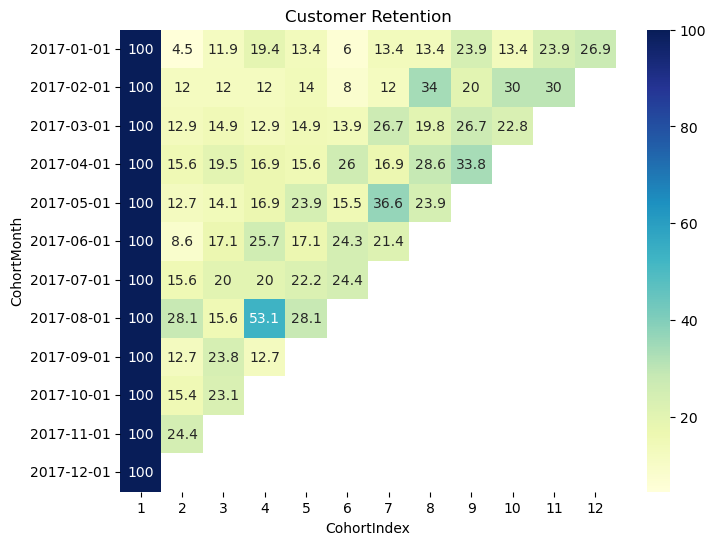

In [73]:
# Plot a haetmap using seaborn

#Initialize your figure size
plt.figure(figsize=(8,6))

# Add a title
plt.title("Customer Retention")

# Create the heatmap
sns.heatmap(
            data=retention_2017, 
            annot=True, 
            fmt = "g",
            cmap="YlGnBu",
            yticklabels = ["2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01",
                           "2017-05-01", "2017-06-01", "2017-07-01", "2017-08-01",
                           "2017-09-01", "2017-10-01","2017-11-01", "2017-12-01"]
            )
plt.show()

The retention rate for each cohort is shown on the graph. There, the boxes with shading denote strong retention whereas the boxes with fading denote low retention.


### Find the average retention rate for each cohort

In [75]:
# Find the mean of various cohort retention rate 

retention_curve_value_2017 = []

for col in retention_2017.columns:
    a = retention_2017[col].mean()
    retention_curve_value_2017.append(a)
    
# Create a dataframe
retention_curve_values_2017 = pd.DataFrame(retention_curve_value_2017)

# Rename column
retention_curve_values_2017.rename(columns = {0 : "Customer Retention"}, inplace = True)

retention_curve_values_2017.round(1)

,Customer Retention
0,100.0
1,14.8
2,17.2
3,21.1
4,18.6
5,16.9
6,21.2
7,23.9
8,26.1
9,22.1


### Analysis of Cohort for the year 2016

In [77]:
# Extract 2016 from the Sales Dataset
df["Year"] = pd.DatetimeIndex(df["Order Date"]).year
data_2016 = np.where(df["Year"] == 2016)
data = df.iloc[data_2016].reset_index()
data.head(2)

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016


In [78]:
# Create a function name get_day to trancate the day

def get_day_2016(x):
    """To convert a datetype column into day"""
    return dt.datetime(x.year, x.month, x.day)

# Create InvoiceDay column
data["InvoiceDay"] = data["Order Date"].apply(get_day_2016) 

# Group by CustomerID and select the InvoiceDay value
grouping = data.groupby("Customer ID")["InvoiceDay"] 

# Assign a minimum InvoiceDay value to the dataset
data["CohortDay"] = grouping.transform("min")
data.head()



,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay
0,0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2016,2016-11-08,2016-11-08
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2016,2016-11-08,2016-11-08
2,2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2016,2016-06-12,2016-06-12
3,13,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,2016,2016-12-05,2016-06-23
4,21,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,2016,2016-12-09,2016-01-10


In [79]:
# Create InvoiceMonth and CohortMonth columns
# Create a function name get_month to trancate the month

def get_month_2016(x):
    """To extract the month from the datetime"""
    return dt.datetime(x.year, x.month, 1)

# Create InvoiceMonth column
data["InvoiceMonth"] = data["Order Date"].apply(get_month_2016)


# Group by CustomerID and select the InvoiceMonth value
grouping = data.groupby("Customer ID")["InvoiceMonth"] 

# Assign a minimum InvoiceMonth value to the dataset
data["CohortMonth"] = grouping.transform("min")

data.head(2)

,index,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,InvoiceDay,CohortDay,InvoiceMonth,CohortMonth
0,0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,2016-11-08,2016-11-08,2016-11-01,2016-11-01
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,2016-11-08,2016-11-08,2016-11-01,2016-11-01


In [80]:
# Create a function name get_date_int get extract the date into integer

def get_date_int_2016(data, column):
    """To take a dataframe and datetype column
    and return the integer value of the column"""
    
    year = data[column].dt.year
    month = data[column].dt.month
    day = data[column].dt.day
    return year, month, day

In [81]:
# Assign integer values to invoice year, month and day using the "InvoiceDay" column
invoice_year, invoice_month, invoice_day = get_date_int_2016(data, "InvoiceDay")

# Assign integer values to invoice year, month and day using the "CohortDay" column
cohort_year, cohort_month, cohort_day = get_date_int_2016(data,"CohortDay")

# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in months from all previous values
data["CohortIndex"] = years_diff * 12 + months_diff + 1

# Groupby "CohortMonth" and "CohortIndex" columns
grouping = data.groupby(["CohortMonth", "CohortIndex"])

# Count number of each group using the "CustomerID" column
cohort_data_2016 = grouping["Customer ID"].apply(pd.Series.nunique)

# Reset the column index
cohort_data_2016 = cohort_data_2016.reset_index()

In [82]:
cohort_data_2016 

,CohortMonth,CohortIndex,Customer ID
0,2016-01-01,1,46
1,2016-01-01,2,1
2,2016-01-01,3,2
3,2016-01-01,4,4
4,2016-01-01,5,5
...,...,...,...
73,2016-10-01,2,9
74,2016-10-01,3,11
75,2016-11-01,1,51
76,2016-11-01,2,8


In [83]:
# Create a pivot table and assign to a variable called cohort_count
cohort_counts_2016 = cohort_data_2016.pivot(index="CohortMonth", columns="CohortIndex", values="Customer ID")

# Output of the cohort_counts
cohort_counts_2016

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,46.0,1.0,2.0,4.0,5.0,5.0,6.0,4.0,8.0,6.0,12.0,12.0
2016-02-01,41.0,3.0,3.0,2.0,6.0,4.0,2.0,7.0,7.0,5.0,7.0,NaN
2016-03-01,75.0,8.0,11.0,12.0,11.0,6.0,19.0,9.0,14.0,18.0,NaN,NaN
2016-04-01,68.0,10.0,7.0,10.0,9.0,21.0,8.0,11.0,16.0,NaN,NaN,NaN
2016-05-01,68.0,6.0,10.0,5.0,19.0,10.0,19.0,11.0,NaN,NaN,NaN,NaN
2016-06-01,54.0,4.0,4.0,15.0,7.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,44.0,6.0,13.0,3.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,50.0,9.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,65.0,3.0,15.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculating Retention Rate for year 2016

In [85]:
# Group the dataframe by "CohortMonth" and "CohortIndex" columns
grouping = data.groupby(["CohortMonth", "CohortIndex"])

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts_2016.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention_2016 = cohort_counts_2016.divide(cohort_sizes, axis=0)

# Convert retention rate to percentages
retention_2016 = (retention_2016*100).round(1)

retention_2016

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2016-01-01,100.0,2.2,4.3,8.7,10.9,10.9,13.0,8.7,17.4,13.0,26.1,26.1
2016-02-01,100.0,7.3,7.3,4.9,14.6,9.8,4.9,17.1,17.1,12.2,17.1,NaN
2016-03-01,100.0,10.7,14.7,16.0,14.7,8.0,25.3,12.0,18.7,24.0,NaN,NaN
2016-04-01,100.0,14.7,10.3,14.7,13.2,30.9,11.8,16.2,23.5,NaN,NaN,NaN
2016-05-01,100.0,8.8,14.7,7.4,27.9,14.7,27.9,16.2,NaN,NaN,NaN,NaN
2016-06-01,100.0,7.4,7.4,27.8,13.0,24.1,24.1,NaN,NaN,NaN,NaN,NaN
2016-07-01,100.0,13.6,29.5,6.8,18.2,20.5,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,100.0,18.0,8.0,16.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,100.0,4.6,23.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


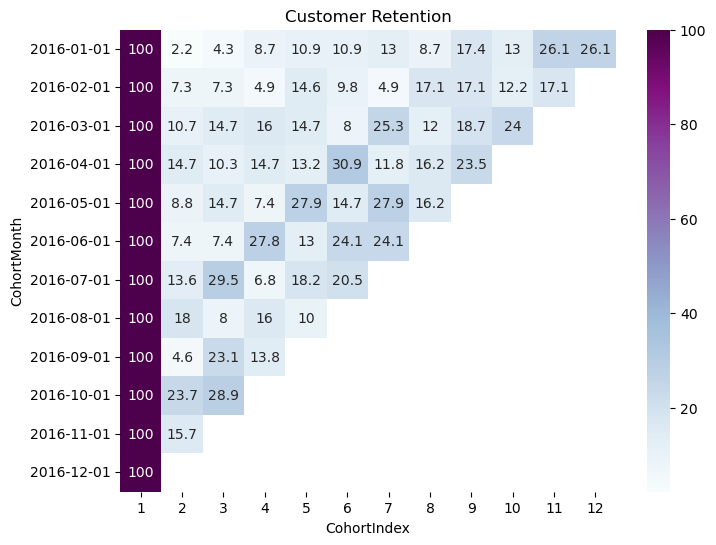

In [86]:
# Plot a haetmap using seaborn

#Initialize your figure size
plt.figure(figsize=(8,6))

# Add a title
plt.title("Customer Retention")

# Create the heatmap
sns.heatmap(
            data=retention_2016, 
            annot=True, 
            fmt = "g",
            cmap="BuPu",
            yticklabels = ["2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01",
                           "2016-05-01", "2016-06-01", "2016-07-01", "2016-08-01",
                           "2016-09-01", "2016-10-01","2016-11-01", "2016-12-01"]
            )
plt.show()

In [89]:
# Find the mean of various cohort retention rate 

retention_curve_value_2016 = []

for col in retention_2016.columns:
    a = retention_2016[col].mean()
    retention_curve_value_2016.append(a)
    
# Create a dataframe
retention_curve_values_2016 = pd.DataFrame(retention_curve_value_2016)

# Rename column
retention_curve_values_2016.rename(columns = {0 : "Customer Retention_2016"}, inplace = True)
retention_curve_values_2016.round(1)

,Customer Retention_2016
0,100.0
1,11.5
2,14.8
3,12.9
4,15.3
5,17.0
6,17.8
7,14.0
8,19.2
9,16.4


### Plot retention curves 2016 & 2017


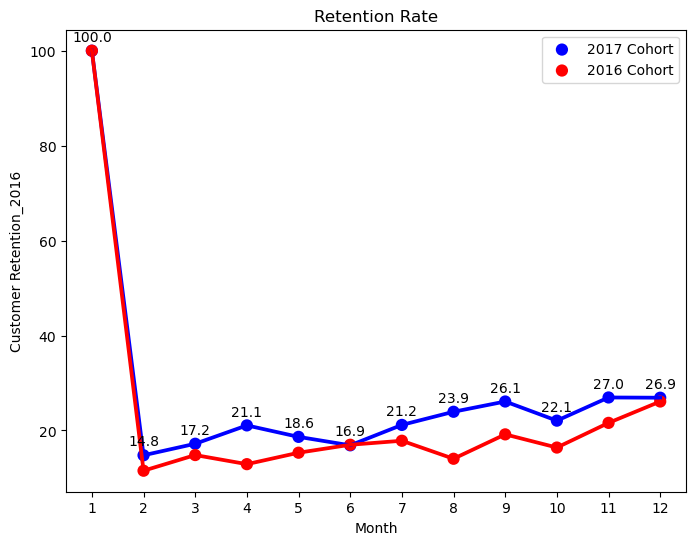

In [92]:
plt.figure(figsize=(8, 6))

# Plot both curves with labels using seaborn pointplot
ax = sns.pointplot(
    x=retention_curve_values_2017.index + 1,
    y=retention_curve_values_2017["Customer Retention"],
    color="blue",
    label="2017 Cohort",
    data=retention_curve_values_2017)

# Plot the second curve with a separate line
sns.pointplot(
    x=retention_curve_values_2016.index + 1,
    y=retention_curve_values_2016["Customer Retention_2016"],
    color="red",
    label="2016 Cohort",
    data=retention_curve_values_2016,
    )

# Show Data Point
for i in range(len(retention_curve_values_2017.index)):
    plt.text(i, retention_curve_values_2017["Customer Retention"][i]+2,
             round(retention_curve_values_2017["Customer Retention"][i],1), 
             ha = "center")
    
    
# Customize x-axis label
plt.xlabel("Month")

# Add legend to differentiate curves
plt.legend()

# Title for the plot
plt.title("Retention Rate")

plt.show()
plt.show()


From the cohort curve, the cohorts 11 and 12 had the highest retention rates at 27.0 and 26.9, respectively. Cohort 2 had the lowest retention rate, with a rate of 14.8 percent.

Given the aforementioned chart and data, this also indicates that the business has a low retention rate.

To gain insight into the cohort, feather analysis must be conducted.